## Goals
In this lab we will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable
- Learn about the cost function $J(w,b)$ that will help us identify which are "good" values for **w** and **b**

# Problem Statement

In this lab we will start by using a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our *data or training set*. The units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

We will use this simiplified model so we can go quickly over the basics of linear regression, and then we will go back and use our data set with more data points.

The following are just some basic tools we will use to speed up our development.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

The following code will create our "data set".
*x_train* represents the input data of our dataset, while *y_train* is the observed output that we will try to model.<br/>
Remember the magnitude of the units as described above.

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Note**: We will be using 'f-string' output formatting

### Number of training examples `m`
The size of our dataset is a very important piece of information, thus we denote this with a special variable `m`. To get this from our dataset without having to manually get it, we can use the `.shape` parameter that Numpy provides for us. This parameter returns the shape of the container of our data, thus, it returns a tuple with an entry for each dimension. In this case we want to get the first dimension, that represents the rows of our data. `x_train.shape[0]` is the length of the array and number of examples as shown below.

>**Note**: We can also use Python's `len()` function

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


### Training example `x_i, y_i`

You will use $(x^{(i)}, y^{(i)})$ to denote the $i^{th}$ training example.

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [4]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^{i}, y^{i}) = ({x_i}, {y_i})")

(x^0, y^0) = (1.0, 300.0)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

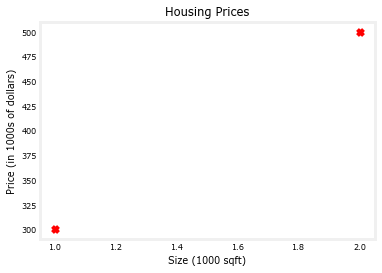

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. 


#### Intuition

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [6]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for our two data points. We can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, we can calculate the function output in a `for` loop as shown in the `compute_model_output` function described below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  


> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   

In [7]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

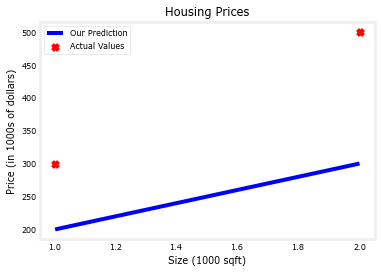

In [8]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

#### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.

In [9]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


<details>
<summary>
    <font size='5', color='darkgreen'><b>Checkpoint</b></font>
</summary>
    <p>
    So far we have learned that:
    <ul>
        <li>Linear regression builds a model which establishes a relationship between features and targets
        <ul> 
            <li>In the example above, the feature was house size and the target was house price</li>
            <li>For simple linear regression, the model has two parameters <b>w</b> and <b>b</b> whose values are 'fit' using <i>training data</i>.</li>
            <li>Once a model's parameters have been determined, the model can be used to make predictions on novel data.</li>
        </ul>
        </li>
    </ul>
    </p>

Now that we have identified what **w** and **b** are and how can they help us represent our information, we have to set a criteria that can evaluate how "good" any given **w** and **b** are for our data. To do so, we will learn about the **Cost function**

## Computing Cost
The term 'cost' in this context might be a little confusing since the data is housing cost. In our area of study, _cost_ is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

The following function calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [10]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

#### Intuition

Our goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

Previously, we determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

<br/>
Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

To help us visualize this, we will import some predefined functions to visualize the behavior of our cost function.

In [11]:
from lab_utils_uni import plt_intuition, plt_stationary, soup_bowl

In [12]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

This plot contains a few points that are worth mentioning.
- Cost is minimized when $w = 200$, which matches results from earlier
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

Now that we have some intuition about this fact, let's include also the value of **b** in our graph; and also add some more data.

It's use instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line.

What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0? 


In [13]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

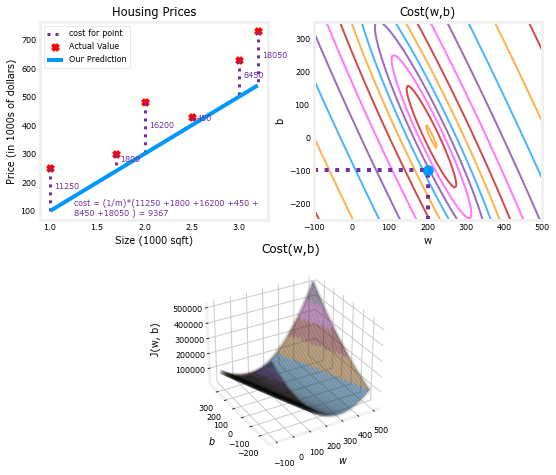

In [14]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
# updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in your training set. In this case, values of approximately $w=209$ and $b=2.4$ provide low cost. Note that, because our training examples are not on a line, the minimum cost is not zero.

The fact that the cost function squares the loss ensures that the 'error surface' is **convex** like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, shows a case where both variables are scaled similarly:

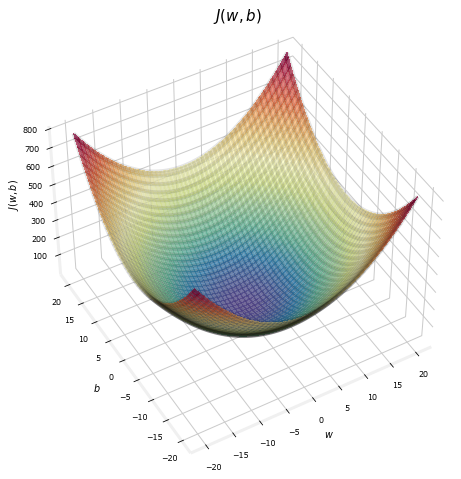

In [15]:
soup_bowl()

<details>
<summary>
    <font size='5', color='darkgreen'><b>Checkpoint</b></font>
</summary>
    <p>
    So far we have learned that:
    <ul>
        <li>The cost equation provides a measure of how well your predictions match your training data.
        </li>
        <li>Minimizing the cost can provide optimal values of <b>w</b>, <b>b</b></li>
    </ul>
    </p>

## Summary

At this point we know:
- The linear regression algorithm
- The cost function and what does it means
- We have intuition on what are the variables we are working with and how we should optimize them.